In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## Load and Inspect Dataset

In [2]:
df = pd.read_csv('F:/Python/DS_takehome_challenges/data_challenge_data/data_challenge_data/conversion_project.csv')
df.sample(5)

,country,age,new_user,source,total_pages_visited,converted
171359,US,35,0,Direct,7,0
106091,US,18,1,Ads,9,0
196179,China,21,0,Direct,5,0
114126,US,35,1,Ads,5,0
130459,Germany,38,1,Seo,4,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 316200 entries, 0 to 316199
Data columns (total 6 columns):
country                316200 non-null object
age                    316200 non-null int64
new_user               316200 non-null int64
source                 316200 non-null object
total_pages_visited    316200 non-null int64
converted              316200 non-null int64
dtypes: int64(4), object(2)
memory usage: 14.5+ MB


In [4]:
df.describe()

,age,new_user,total_pages_visited,converted
count,316200.000000,316200.000000,316200.000000,316200.000000
mean,30.569858,0.685465,4.872966,0.032258
std,8.271802,0.464331,3.341104,0.176685
min,17.000000,0.000000,1.000000,0.000000
25%,24.000000,0.000000,2.000000,0.000000
50%,30.000000,1.000000,4.000000,0.000000
75%,36.000000,1.000000,7.000000,0.000000
max,123.000000,1.000000,29.000000,1.000000


## Handle Outliers in Age

We noticed the max of Age is 123 in the dataset. The average age is 30.5, and age of 123 is not realistic, so we should deal with the outliers.

In [5]:
len(df[df['age']>80])

2

Only 2 records are outliers, we can remove them directly

In [6]:
df = df[df['age']<=80]

In [7]:
df.shape

(316198, 6)

In [8]:
df.describe()

,age,new_user,total_pages_visited,converted
count,316198.000000,316198.000000,316198.000000,316198.000000
mean,30.569311,0.685469,4.872918,0.032252
std,8.268958,0.464329,3.341053,0.176669
min,17.000000,0.000000,1.000000,0.000000
25%,24.000000,0.000000,2.000000,0.000000
50%,30.000000,1.000000,4.000000,0.000000
75%,36.000000,1.000000,7.000000,0.000000
max,79.000000,1.000000,29.000000,1.000000


## Exploratory Data Analysis

### Conversion Rate by Country

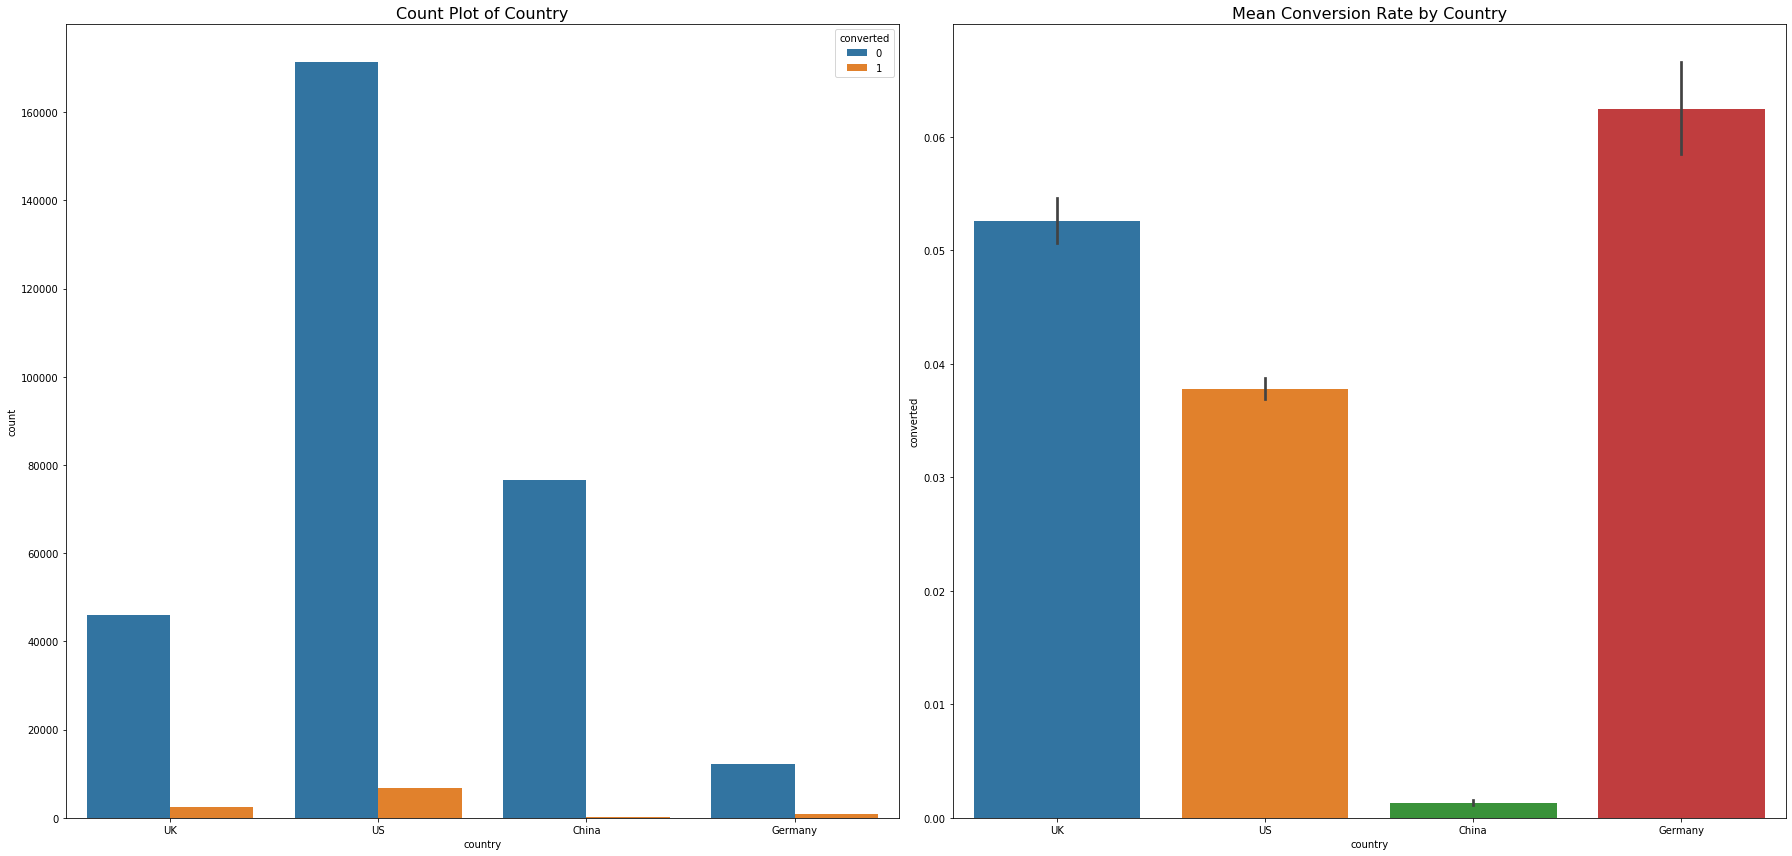

In [9]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(25, 12))
sns.countplot(x='country', hue='converted', data=df, ax=ax[0])
ax[0].set_title('Count Plot of Country', fontsize=16)
sns.barplot(x='country', y='converted', data=df, ax=ax[1]);
ax[1].set_title('Mean Conversion Rate by Country', fontsize=16)
plt.tight_layout()
plt.show()

### Conversion Rate by User Type

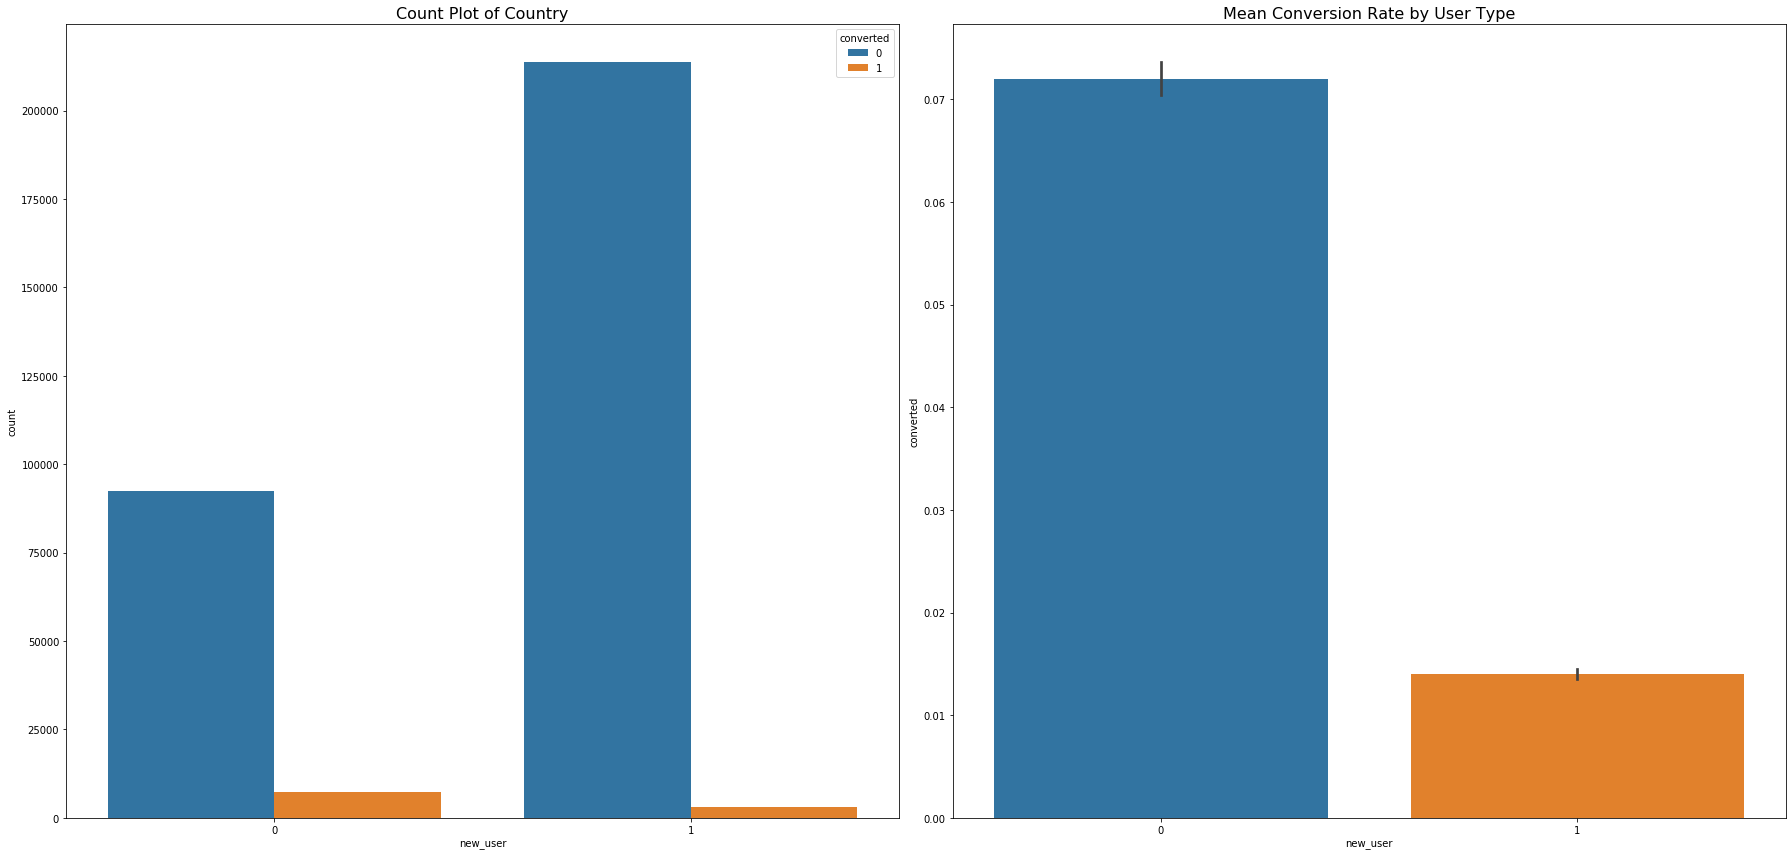

In [10]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(25, 12))
sns.countplot(x='new_user', hue='converted', data=df, ax=ax[0])
ax[0].set_title('Count Plot of Country', fontsize=16)
sns.barplot(x='new_user', y='converted', data=df, ax=ax[1]);
ax[1].set_title('Mean Conversion Rate by User Type', fontsize=16)
plt.tight_layout()
plt.show()

### Conversion Rate by Source

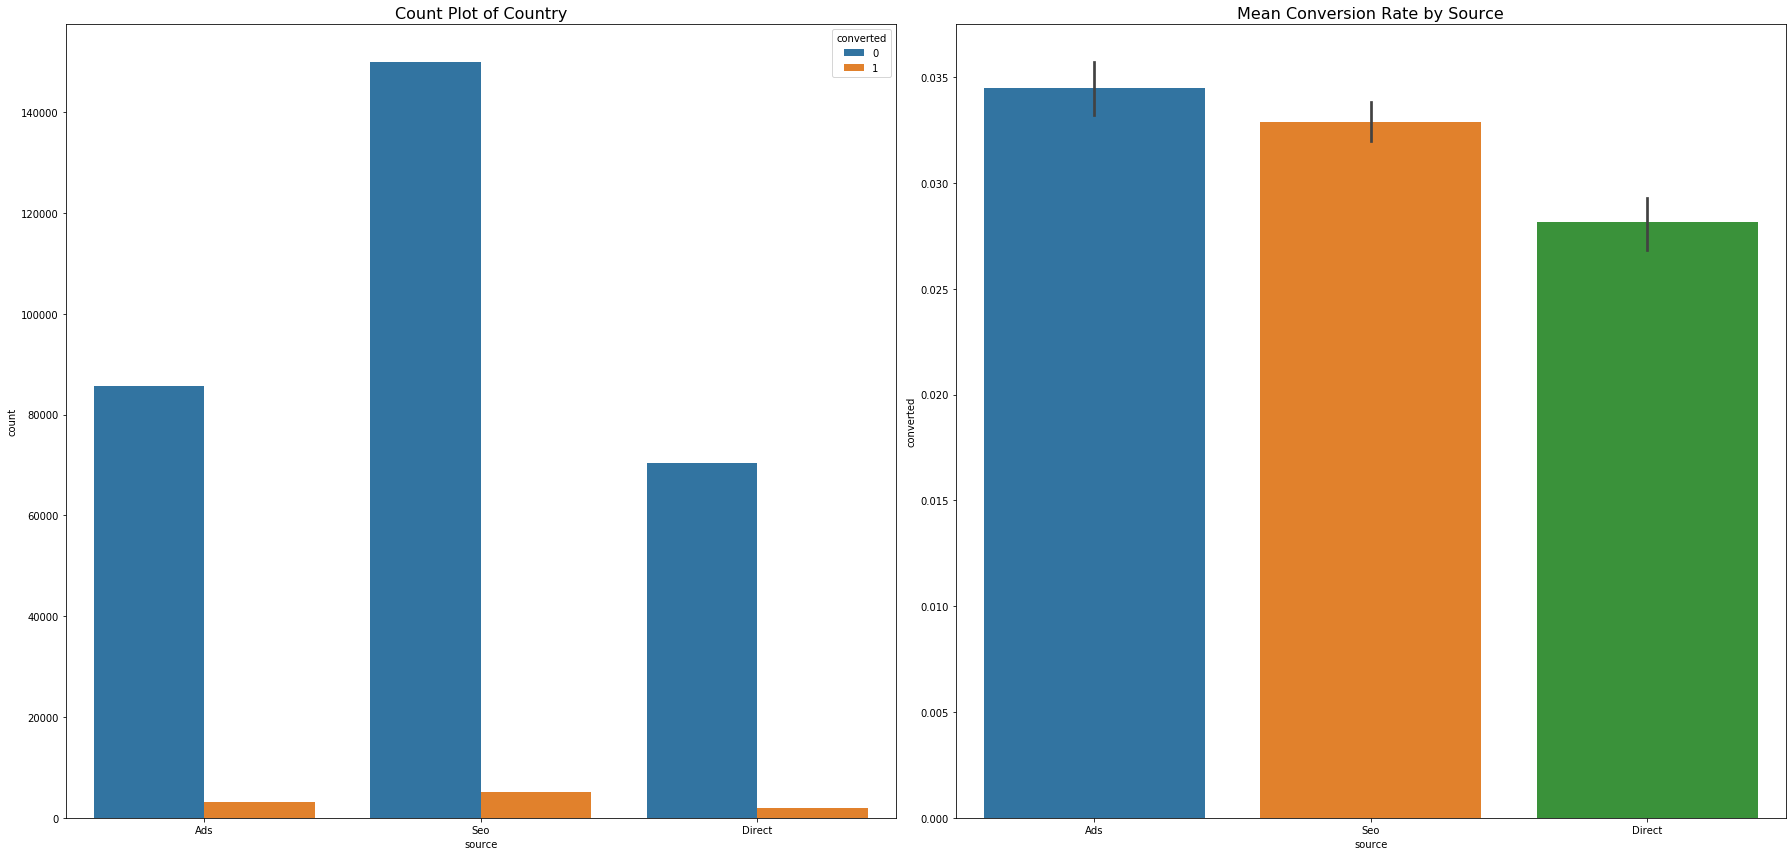

In [11]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(25, 12))
sns.countplot(x='source', hue='converted', data=df, ax=ax[0])
ax[0].set_title('Count Plot of Country', fontsize=16)
sns.barplot(x='source', y='converted', data=df, ax=ax[1]);
ax[1].set_title('Mean Conversion Rate by Source', fontsize=16)
plt.tight_layout()
plt.show()

### Age & Conversion Rate

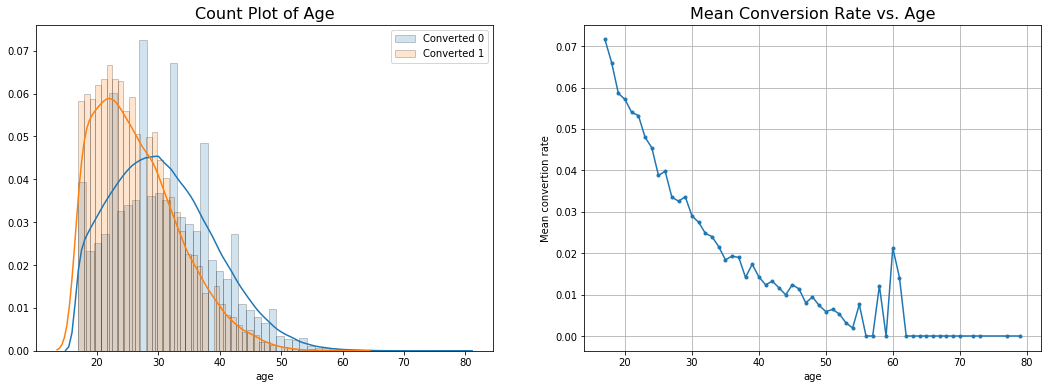

In [12]:
grouped_age = df[['age', 'converted']].groupby('age').mean().reset_index()
hist_kws={'histtype': 'bar', 'edgecolor':'black', 'alpha': 0.2}

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(18, 6))
sns.distplot(df[df['converted'] == 0]['age'], label='Converted 0', 
             ax=ax[0], hist_kws=hist_kws)
sns.distplot(df[df['converted'] == 1]['age'], label='Converted 1', 
             ax=ax[0], hist_kws=hist_kws)
ax[0].set_title('Count Plot of Age', fontsize=16)
ax[0].legend()
ax[1].plot(grouped_age['age'], grouped_age['converted'], '.-')
ax[1].set_title('Mean Conversion Rate vs. Age', fontsize=16)
ax[1].set_xlabel('age')
ax[1].set_ylabel('Mean convertion rate')
ax[1].grid(True)
plt.show()

### Total Pages Visited & Conversion Rate

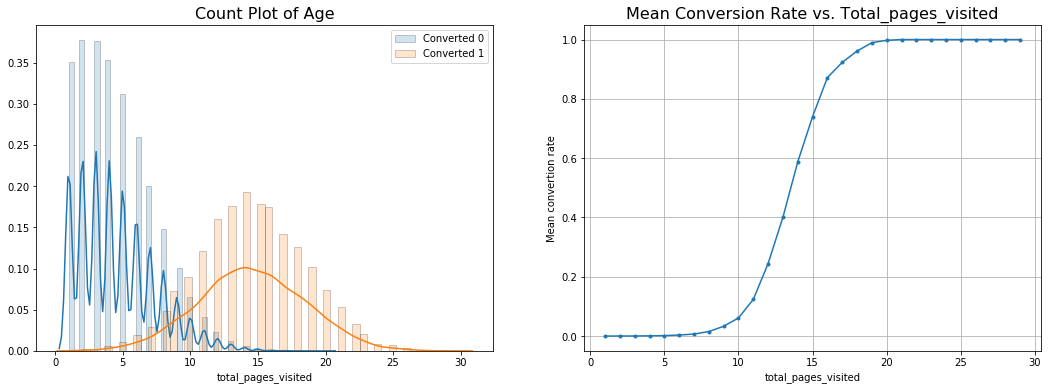

In [13]:
grouped_vt = df[['total_pages_visited', 'converted']].groupby('total_pages_visited').mean().reset_index()

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(18, 6))
sns.distplot(df[df['converted'] == 0]['total_pages_visited'], 
             label='Converted 0', ax=ax[0], hist_kws=hist_kws)
sns.distplot(df[df['converted'] == 1]['total_pages_visited'], 
             label='Converted 1', ax=ax[0], hist_kws=hist_kws)
ax[0].set_title('Count Plot of Age', fontsize=16)
ax[0].legend()
ax[1].plot(grouped_vt['total_pages_visited'], grouped_vt['converted'], '.-')
ax[1].set_title('Mean Conversion Rate vs. Total_pages_visited', fontsize=16)
ax[1].set_xlabel('total_pages_visited')
ax[1].set_ylabel('Mean convertion rate')
ax[1].grid(True)
plt.show()

## Data Pre-Processing

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 316198 entries, 0 to 316199
Data columns (total 6 columns):
country                316198 non-null object
age                    316198 non-null int64
new_user               316198 non-null int64
source                 316198 non-null object
total_pages_visited    316198 non-null int64
converted              316198 non-null int64
dtypes: int64(4), object(2)
memory usage: 26.9+ MB


new_user should be categorical variable

In [15]:
df['new_user'] = df['new_user'].astype('category')


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 316198 entries, 0 to 316199
Data columns (total 6 columns):
country                316198 non-null object
age                    316198 non-null int64
new_user               316198 non-null category
source                 316198 non-null object
total_pages_visited    316198 non-null int64
converted              316198 non-null int64
dtypes: category(1), int64(3), object(2)
memory usage: 24.8+ MB


## Model before balancing data

In [17]:
df_dummies = pd.get_dummies(df)
df_dummies.head()

,age,total_pages_visited,converted,country_China,country_Germany,country_UK,country_US,new_user_0,new_user_1,source_Ads,source_Direct,source_Seo
0,25,1,0,0,0,1,0,0,1,1,0,0
1,23,5,0,0,0,0,1,0,1,0,0,1
2,28,4,0,0,0,0,1,0,1,0,0,1
3,39,5,0,1,0,0,0,0,1,0,0,1
4,30,6,0,0,0,0,1,0,1,0,0,1


In [18]:
y = df_dummies['converted']
X = df_dummies.drop(columns=['converted'])

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=0)

sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

### Logistic Regression

In [20]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix

In [21]:
lr = LogisticRegression()
lr.fit(X_train_std, y_train)
y_lr_pred = lr.predict(X_test_std)

d:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [22]:
print('Accuracy: %.4f' % accuracy_score(y_test, y_lr_pred))
print(confusion_matrix(y_test, y_lr_pred))
print(classification_report(y_test,y_lr_pred))

Accuracy: 0.9861
[[91484   362]
 [  960  2054]]
              precision    recall  f1-score   support

           0       0.99      1.00      0.99     91846
           1       0.85      0.68      0.76      3014

    accuracy                           0.99     94860
   macro avg       0.92      0.84      0.87     94860
weighted avg       0.99      0.99      0.99     94860



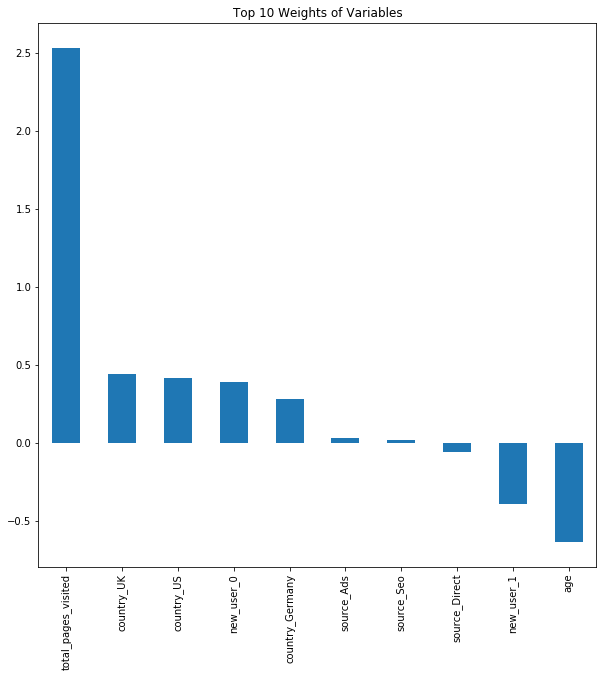

In [23]:
plt.figure(figsize=(10,10))
plt.title('Top 10 Weights of Variables')
weights = pd.Series(lr.coef_[0],
                 index=X.columns.values)
weights.sort_values(ascending = False)[:10].plot(kind='bar')

In [24]:
from sklearn.metrics import roc_curve, roc_auc_score

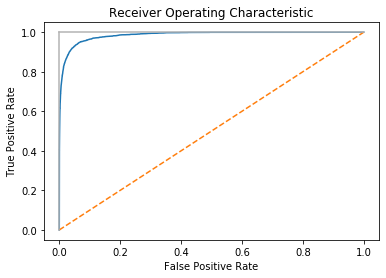

In [25]:
y_score = lr.predict_proba(X_test_std)[:,1]
# Create true and false positive rates
false_positive_rate, true_positive_rate, threshold = roc_curve(y_test, y_score)
# Plot ROC curve
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate, true_positive_rate)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

### Decision Tree

In [26]:
from sklearn.tree import DecisionTreeClassifier

In [27]:
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)
y_clf_pred = clf.predict(X_test_std)
print('Accuracy: %.4f' % accuracy_score(y_test, y_clf_pred))
print(confusion_matrix(y_test, y_clf_pred))
print(classification_report(y_test,y_clf_pred))

Accuracy: 0.9682
[[91846     0]
 [ 3014     0]]
              precision    recall  f1-score   support

           0       0.97      1.00      0.98     91846
           1       0.00      0.00      0.00      3014

    accuracy                           0.97     94860
   macro avg       0.48      0.50      0.49     94860
weighted avg       0.94      0.97      0.95     94860



d:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


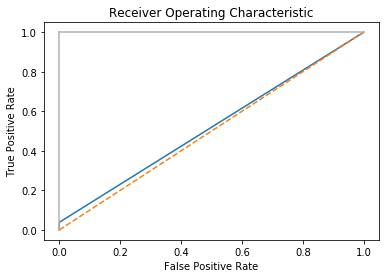

In [28]:
y_score = clf.predict_proba(X_test_std)[:,1]
# Create true and false positive rates
false_positive_rate, true_positive_rate, threshold = roc_curve(y_test, y_score)
# Plot ROC curve
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate, true_positive_rate)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()